### Importamos librerias

In [41]:
import pandas as pd
import numpy as np

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [45]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
#no se que onda esta
#import warnings
#warnings.filterwarnings('ignore')

### Estilo

In [47]:
sns.set()
plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 20
sns.mpl.rcParams['axes.labelsize'] = 18

### Dataset

Autor: PRACHI GOPALANI

In [48]:
# levantando el csv de Train
data = pd.read_csv('Train.csv')

In [49]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [50]:
data = data.rename(columns={'Reached.on.Time_Y.N': 'On_time'})

In [51]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Importante aclarar lo siguiente: "On time: it is the target variable, 
where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time."

### Funciones

In [52]:
def basic_EDA(data) :
    u'''
    Basic EDA routine for this practice
    '''
    
    print()
    print("Observaciones", data.shape[0], "Features", data.shape[1])
    display(data.head(5))
    
    print()
    print("Descripción de las features")
    display(data.describe())
    
    print()
    print("Valores nulos")
    display(data.isnull().sum())
    
    print()
    print("Tipos de dato")
    display(data.dtypes)
    
    print()
    print("Cantidad de valores únicos")
    for i in data.columns:
        print(i,data[i].nunique())

    # La característica Score_point es del tipo objet y presenta valores no numéricos
    # al no contar con información sobre su significado se elimina del dataset
    #data.drop('Score_point', axis=1, inplace=True)

    # to have more legibility
    #data['label_means'] = data['label'].map({0 : 'insolvency', 1 : 'pay credit'})
    
    # to have more legibility
    data['On_time_means'] = data['On_time'].map({0 : 'on_time', 1 : 'delayed'})  
    
    return data

#### EDA (Exploratory Data Analysis)

In [53]:
data = basic_EDA(data)


Observaciones 10999 Features 12


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1



Descripción de las features


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000



Valores nulos


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
On_time                0
dtype: int64


Tipos de dato


ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
On_time                 int64
dtype: object


Cantidad de valores únicos
ID 10999
Warehouse_block 5
Mode_of_Shipment 3
Customer_care_calls 6
Customer_rating 5
Cost_of_the_Product 215
Prior_purchases 8
Product_importance 3
Gender 2
Discount_offered 65
Weight_in_gms 4034
On_time 2


In [54]:
print("Variables categoricas")
categoricas = [column for column in data.columns if data[column].dtypes == object ]
print(categoricas)
    
print("Variables numericas")
numericas = [column for column in data.columns if data[column].dtypes == "int64" ]
print(numericas)

Variables categoricas
['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'On_time_means']
Variables numericas
['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'On_time']


Vemos que todas las variables númericas son int, por ende no hace falta transformar nada.

<AxesSubplot:>

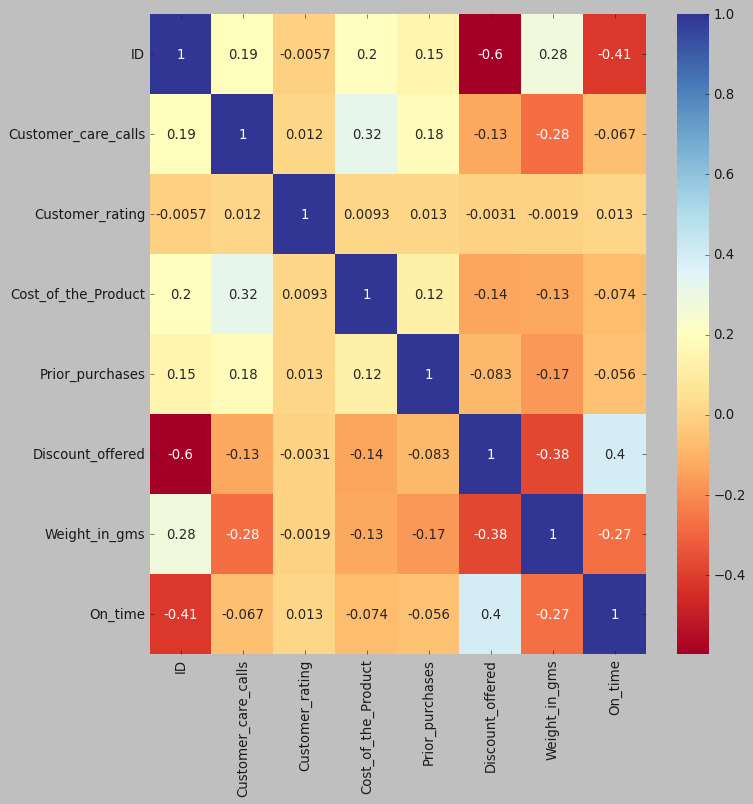

In [55]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data.corr(), annot = True, cmap="RdYlBu")

Se puede observar que las variables no están muy correlacionadas entre sí

In [56]:
#que será esto? skew es sesgo pero no se la verdad --> "Return unbiased skew over requested axis."
data.skew()

ID                     0.000000
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
On_time               -0.394257
dtype: float64

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

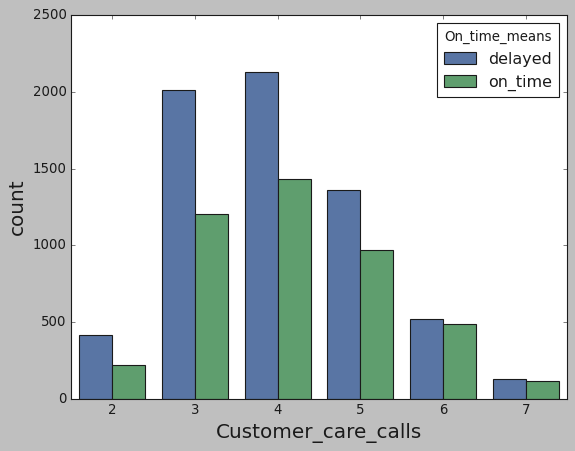

In [57]:
sns.countplot(x='Customer_care_calls',hue='On_time_means',data=data)
# we can see there are more than 2000 instances where the customer has to call 4 times in order get the package delivered

Veamos si el envío esta afectado por la importancia del producto

###### Ojo con lo siguiente

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

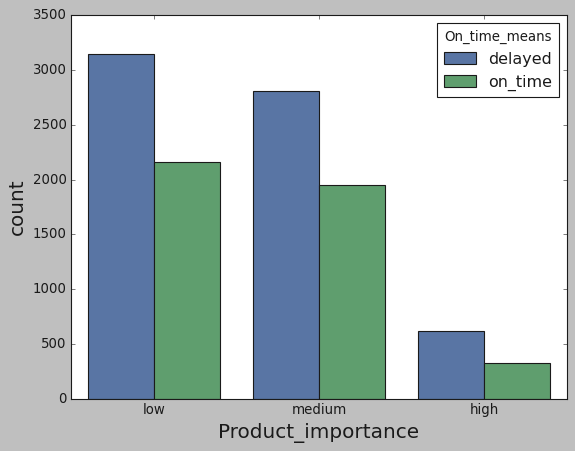

In [58]:
sns.countplot(x='Product_importance',hue='On_time_means',data=data)
#Se puede observar que los productos con baja importancia, fueron envíos demorados ##(toto) no lo veo a eso jaja

Hay outliers en precio?

<AxesSubplot:xlabel='Cost_of_the_Product'>

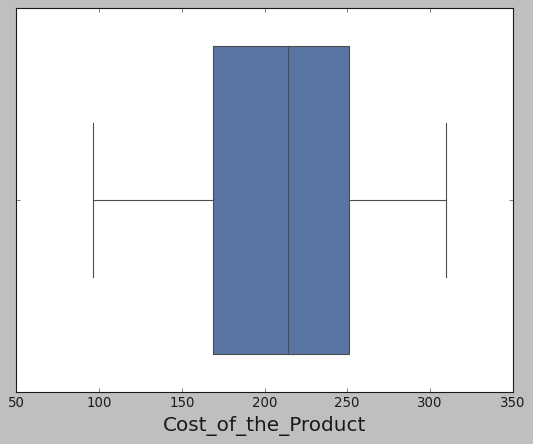

In [59]:
sns.boxplot(x='Cost_of_the_Product',data=data) #no outliers

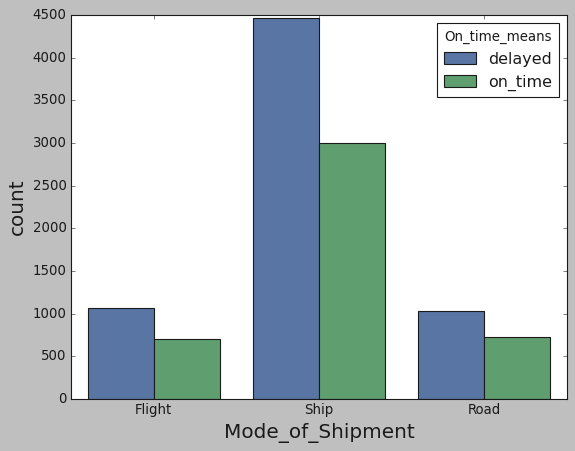

In [60]:
ax = sns.countplot(x='Mode_of_Shipment',hue='On_time_means',data=data)
# shipment is mostly done by ship

In [61]:
#La columna ID no nos aporta nada asique la dropeamos
data.drop(['ID'],inplace=True,axis=1)

Como no tenemos nulos, no tenemos nada que imputar y procedemos a dumificar

###### Debemos dumificar las variables object

In [62]:
#data["Cost_of_the_Product"]=pd.cut(data["Cost_of_the_Product"],bins=3, labels=["low","medium","high"])


In [63]:
#data["Weight_in_gms"] = pd.cut(data["Weight_in_gms"],bins=3, labels=["low","medium","high"])

In [64]:
#data["Discount_offered"] = pd.cut(data["Discount_offered"],bins=3,labels=["low","medium","high"])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  On_time              10999 non-null  int64 
 11  On_time_means        10999 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.0+ MB


In [66]:
#categoricas1 =  [ column for column in data.columns if data[column].dtypes == "category"]
#categoricas1

In [67]:
data_dummies = pd.get_dummies(data[categoricas],drop_first=True)

In [68]:
#data_dummies1 = pd.get_dummies(data[categoricas1], drop_first=True)

In [69]:
data = pd.concat([data,data_dummies],axis=1)


In [70]:
data = data.drop(categoricas,axis=1)

In [71]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M,On_time_means_on_time
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1,0
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1,0
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1,0
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0,0


# MODELOS DE MACHINE LEARNING

In [72]:
#para ver si estan balanceadas
data.On_time.value_counts(normalize = True)

1    0.596691
0    0.403309
Name: On_time, dtype: float64

In [73]:
X = data.drop(['On_time','On_time_means_on_time'], axis=1)
y = data['On_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2,stratify = y)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test :", y_test.shape)

X_train: (7369, 15)
y_train: (7369,)
X_test:  (3630, 15)
y_test : (3630,)


In [74]:
y_train.value_counts(normalize = True)

1    0.596689
0    0.403311
Name: On_time, dtype: float64

In [75]:
y_test.value_counts(normalize = True)

1    0.596694
0    0.403306
Name: On_time, dtype: float64

In [76]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


# KNN

In [77]:
def scores_knn(X,y,start,stop,folds):
    kf= KFold(n_splits=folds,shuffle=True,random_state=2)
    
    scores=[]
    for i in range (start,stop):
        knn = KNeighborsClassifier(n_neighbors=i)   #PODRIA AGREGAR UNA METRICA
        
        cv_scores = cross_val_score(knn, X,y, cv=kf)
        
        diccionario = {"score_medio":np.mean(cv_scores),"n_neighbors":i,'score_std':np.std(cv_scores)}
        
        scores.append(diccionario)
        
    dfscores=pd.DataFrame(scores)
        
    dfscores['limite_inferior'] = dfscores['score_medio'] - dfscores['score_std']
    dfscores['limite_superior'] = dfscores['score_medio'] + dfscores['score_std']
    
    return dfscores

In [78]:
df_scores = scores_knn(X_train_std,y_train,1,25,5)
df_scores

,score_medio,n_neighbors,score_std,limite_inferior,limite_superior
0,0.621658,1,0.008815,0.612844,0.630473
1,0.635229,2,0.010106,0.625122,0.645335
2,0.633603,3,0.012448,0.621155,0.646051
3,0.624510,4,0.008455,0.616054,0.632965
4,0.627225,5,0.013681,0.613544,0.640905
5,0.624374,6,0.008186,0.616188,0.632559
6,0.624511,7,0.013128,0.611382,0.637639
7,0.628853,8,0.009535,0.619318,0.638388
8,0.626818,9,0.013940,0.612878,0.640758
9,0.632517,10,0.009384,0.623132,0.641901


(0.6, 0.65)

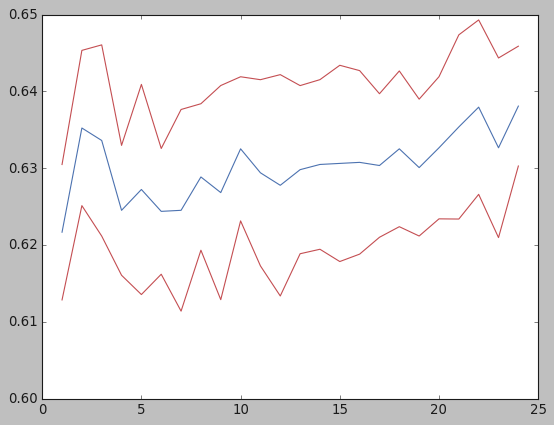

In [188]:
plt.plot(df_scores["n_neighbors"],df_scores["limite_inferior"],color="r")
plt.plot(df_scores["n_neighbors"],df_scores["limite_superior"],color="r")
plt.plot(df_scores["n_neighbors"],df_scores["score_medio"],color="b")
plt.ylim(0.6,0.65)

In [80]:
df_scores[df_scores.score_medio==df_scores.score_medio.max()]

,score_medio,n_neighbors,score_std,limite_inferior,limite_superior
23,0.63808,24,0.007801,0.630279,0.645881


In [81]:
bestk = df_scores[df_scores.score_medio==df_scores.score_medio.max()].n_neighbors.values[0]
bestk

24

In [82]:
knn = KNeighborsClassifier(n_neighbors= bestk)

knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=24)

In [84]:
ypred_test= knn.predict(X_test_std)
accuracy_score(y_test,ypred_test)

0.6294765840220385

In [85]:
cm = confusion_matrix(y_test, ypred_test)
cm

array([[ 972,  492],
       [ 853, 1313]], dtype=int64)

Voy a probar con grid search aplicando distintos hiperparametros

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
knn_grid = KNeighborsClassifier()

In [88]:
gs_params= {'n_neighbors': range(1,20), 
            'weights' : ['uniform', 'distance'], 
            'p' : [1, 2, 3]}
kf= KFold(n_splits=5,shuffle=True,random_state=2)

In [89]:
grid = GridSearchCV(knn_grid,gs_params, cv=kf, scoring='accuracy')

In [90]:
grid.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [107]:
df_scores_grid = pd.DataFrame(grid.cv_results_)
df_scores_grid.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016604,0.001636,0.066041,0.001074,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.620760,0.604478,0.609905,0.626866,0.615071,0.615416,0.007871,111
1,0.015547,0.000488,0.045249,0.000797,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.620760,0.604478,0.609905,0.626866,0.615071,0.615416,0.007871,111
2,0.015958,0.000022,0.066561,0.001347,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.638399,0.615332,0.614654,0.617368,0.622539,0.621658,0.008815,108


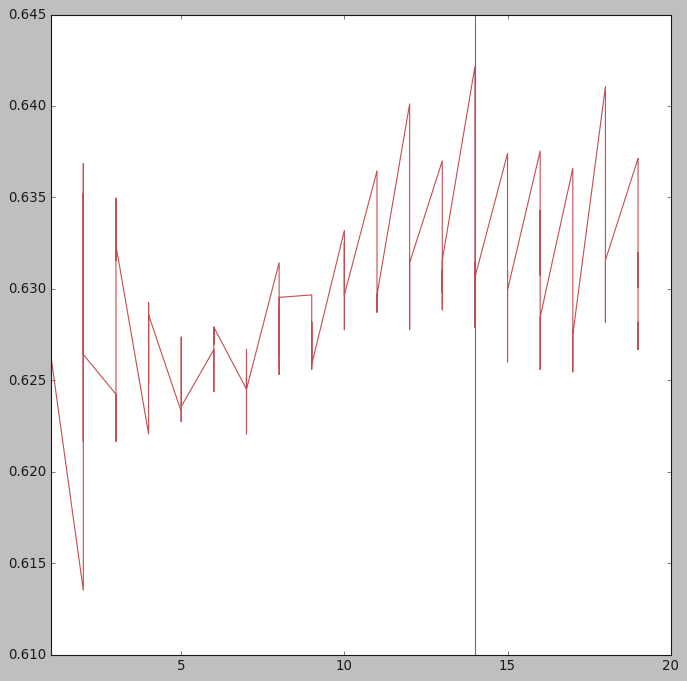

In [147]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.plot(df_scores_grid["param_n_neighbors"],df_scores_grid["mean_test_score"],color="r")
ax.set_xlim(1, 20)
ax.axvline(grid.best_params_["n_neighbors"], color="b")

In [93]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=14, p=1)

In [94]:
grid.best_score_

0.6421527798887436

In [146]:
grid.best_params_

{'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}

In [96]:
y_pred_grid = grid.predict(X_test_std)

In [97]:
accuracy_score(y_test,y_pred_grid)

0.634435261707989

In [148]:
confusion = confusion_matrix(y_test, y_pred_grid)


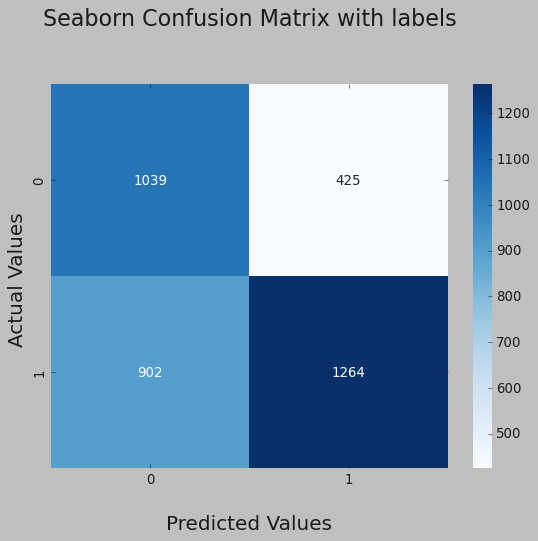

In [103]:
ax = sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.0f')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [181]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.54      0.71      0.61      1464
           1       0.75      0.58      0.66      2166

    accuracy                           0.63      3630
   macro avg       0.64      0.65      0.63      3630
weighted avg       0.66      0.63      0.64      3630



# REGRESION LOGISTICA

In [162]:
lr_grid = LogisticRegression()

In [163]:
gs_params_lr ={'C': [0.1,0.5,0.8, 1, 10, 100], 
            'penalty': ['l1', 'l2', 'elasticnet'], 
            'solver': ['saga', 'liblinear']} 

In [164]:
grid_lr = GridSearchCV(lr_grid, gs_params_lr, scoring="accuracy")

In [165]:
grid_lr.fit(X_train_std,y_train)

C:\Users\orest\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\orest\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\orest\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\orest\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

C:\Users\orest\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\orest\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\orest\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\orest\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 0.8, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'liblinear']},
             scoring='accuracy')

In [166]:
df_scores_grid_lr = pd.DataFrame(grid_lr.cv_results_)
df_scores_grid_lr.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020199,0.001058,0.000824,0.000416,0.1,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.641791,0.628901,0.646540,0.635007,0.623218,0.635091,0.008429,24
1,0.008971,0.000632,0.000995,0.000002,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.641791,0.630258,0.646540,0.636364,0.623218,0.635634,0.008252,23
2,0.014366,0.000479,0.001009,0.000030,0.1,l2,saga,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.651967,0.628223,0.649932,0.635007,0.627970,0.638620,0.010399,2


In [167]:
grid_lr.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [169]:
grid_lr.best_score_

0.639026677388838

In [170]:
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [171]:
y_pred_grid_lr = grid_lr.predict(X_test_std)

In [172]:
accuracy_score(y_test,y_pred_grid_lr)

0.6371900826446281

In [178]:
confusion_lr = confusion_matrix(y_test, y_pred_grid_lr)

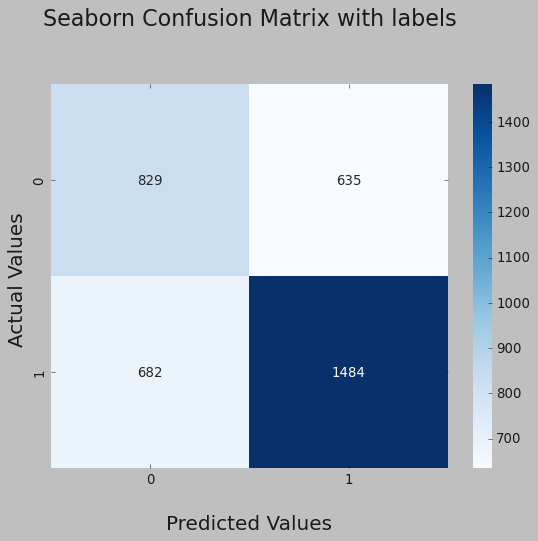

In [179]:
ax = sns.heatmap(confusion_lr, annot=True, cmap='Blues', fmt='.0f')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

Voy a aplicar el modelo con los mejores hiperparametros para obtener graficas representativas

In [175]:
lr = LogisticRegression(C= 0.1 , penalty = "l2" , solver = "liblinear")

In [176]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=0.1, solver='liblinear')

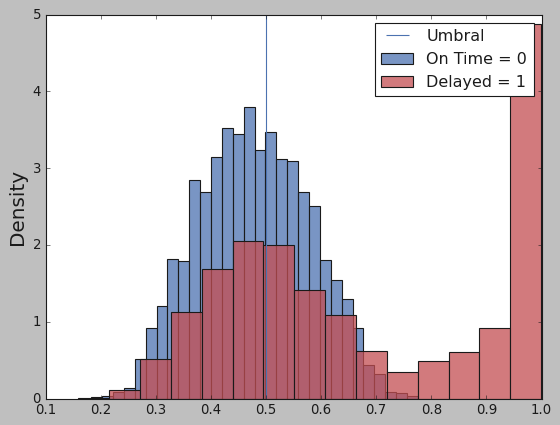

In [177]:
sns.histplot(lr.predict_proba(X_train_std[y_train==0])[:,1], stat="density")
sns.histplot(lr.predict_proba(X_train_std[y_train==1])[:,1], color="r",stat="density")
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.legend(['Umbral', 'On Time = 0', 'Delayed = 1'])

In [182]:
print(classification_report(y_test, y_pred_grid_lr))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1464
           1       0.70      0.69      0.69      2166

    accuracy                           0.64      3630
   macro avg       0.62      0.63      0.62      3630
weighted avg       0.64      0.64      0.64      3630

